# Dense Deep Neural Network: Handwritten Digit Recognition

This notebook uses the classic [MNIST handwritten digit](http://yann.lecun.com/exdb/mnist/) dataset, which contains digit 0-9 images of size 28*28. We build a dense neural network to predict the class of digit.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from keras.utils import np_utils
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.optimizers import SGD, Adam, RMSprop, Adagrad

## The MNIST dataset

### Get the data
MNIST dataset is provided by Keras directly. The following codes show how to load it. 

In [2]:
help(mnist.load_data)

Help on function load_data in module keras.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
      path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).
    
    Returns:
      Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **x_train**: uint8 NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **x_test**: uint8 NumPy array of grayscale image data with shapes
      (10000, 28, 28), containing the test data. Pixel values range
      from 0 to 255.
    
  

In [3]:
# the data, shuffled and split between train and test sets 
(X_train_pre, y_train_pre), (X_test_pre, y_test_pre) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### Reshape and normalize the features

In [4]:
input_dim = 784 # 28*28
X_train = X_train_pre.reshape(X_train_pre.shape[0], input_dim) 
X_test = X_test_pre.reshape(X_test_pre.shape[0], input_dim) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255. 
X_test /= 255.

print('training data shape:', X_train.shape)
print('{} train samples, {} test samples'.format(X_train.shape[0], X_test.shape[0]))

training data shape: (60000, 784)
60000 train samples, 10000 test samples


### convert class vectors to binary class matrices
convert class label to one-hot coding

In [5]:
num_classes = 10 # 0-9
y_train = keras.utils.to_categorical(y_train_pre, num_classes)
y_test = keras.utils.to_categorical(y_test_pre, num_classes)
# the first 5 samples are 5,0,4,1,9
y_train[:5,] 

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [22]:
validation_split = 0.166667
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))

training data shape: (4033, 784)
4033 train samples, 806 validation samples, 10000 test samples


## The model

### Build the model

## Base model

Epoch 1/20
32/32 [==============================] - 1s 9ms/step - loss: 0.7695 - accuracy: 0.7669 - val_loss: 0.5142 - val_accuracy: 0.8400
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 0.3483 - accuracy: 0.8939 - val_loss: 0.3680 - val_accuracy: 0.8871
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.2378 - accuracy: 0.9283 - val_loss: 0.3992 - val_accuracy: 0.8734
Epoch 4/20
32/32 [==============================] - 0s 5ms/step - loss: 0.1757 - accuracy: 0.9447 - val_loss: 0.2495 - val_accuracy: 0.9194
Epoch 5/20
32/32 [==============================] - 0s 5ms/step - loss: 0.1241 - accuracy: 0.9618 - val_loss: 0.2303 - val_accuracy: 0.9218
Epoch 6/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0995 - accuracy: 0.9707 - val_loss: 0.4030 - val_accuracy: 0.8697
Epoch 7/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0681 - accuracy: 0.9812 - val_loss: 0.3095 - val_accuracy: 0.9057
Epoch 8/20
32/32 [==

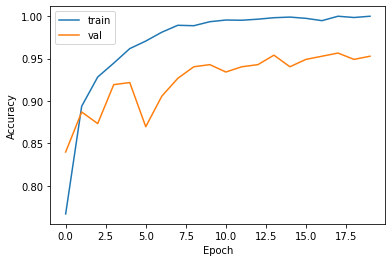

Testing set accuracy: 94.89%
Epoch 1/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0125 - accuracy: 0.9980 - val_loss: 0.2356 - val_accuracy: 0.9504
Epoch 2/20
32/32 [==============================] - 0s 5ms/step - loss: 1.8139e-04 - accuracy: 1.0000 - val_loss: 0.2529 - val_accuracy: 0.9553
Epoch 3/20
32/32 [==============================] - 0s 5ms/step - loss: 0.0160 - accuracy: 0.9963 - val_loss: 0.2700 - val_accuracy: 0.9404
Testing set accuracy: 94.89%


In [23]:
#from keras.layers import Dropout

model = keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(128, activation='relu')) 
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['accuracy'])

EPOCHS = 20

history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

EPOCHS = 20

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)


history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))



## Iteration 1

training data shape: (40000, 784)
40000 train samples, 10000 validation samples, 10000 test samples
Epoch 1/40
313/313 [==============================] - 2s 4ms/step - loss: 1.9753 - accuracy: 0.3713 - val_loss: 1.6374 - val_accuracy: 0.5660
Epoch 2/40
313/313 [==============================] - 1s 4ms/step - loss: 1.4314 - accuracy: 0.6505 - val_loss: 1.2394 - val_accuracy: 0.7135
Epoch 3/40
313/313 [==============================] - 1s 4ms/step - loss: 1.1214 - accuracy: 0.7470 - val_loss: 0.9985 - val_accuracy: 0.7765
Epoch 4/40
313/313 [==============================] - 1s 4ms/step - loss: 0.9269 - accuracy: 0.7910 - val_loss: 0.8426 - val_accuracy: 0.8055
Epoch 5/40
313/313 [==============================] - 1s 4ms/step - loss: 0.7975 - accuracy: 0.8158 - val_loss: 0.7355 - val_accuracy: 0.8250
Epoch 6/40
313/313 [==============================] - 1s 4ms/step - loss: 0.7066 - accuracy: 0.8327 - val_loss: 0.6587 - val_accuracy: 0.8381
Epoch 7/40
313/313 [============================

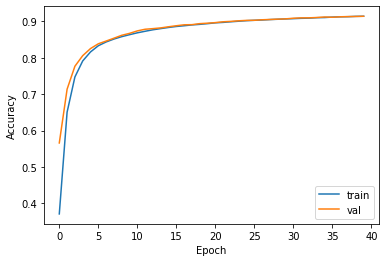

Testing set accuracy: 91.52%
Epoch 1/40
625/625 [==============================] - 2s 4ms/step - loss: 0.2952 - accuracy: 0.9143 - val_loss: 0.2888 - val_accuracy: 0.9142
Epoch 2/40
625/625 [==============================] - 2s 4ms/step - loss: 0.2911 - accuracy: 0.9154 - val_loss: 0.2844 - val_accuracy: 0.9158
Epoch 3/40
625/625 [==============================] - 2s 4ms/step - loss: 0.2872 - accuracy: 0.9164 - val_loss: 0.2814 - val_accuracy: 0.9185
Epoch 4/40
625/625 [==============================] - 2s 4ms/step - loss: 0.2835 - accuracy: 0.9176 - val_loss: 0.2786 - val_accuracy: 0.9183
Epoch 5/40
625/625 [==============================] - 2s 4ms/step - loss: 0.2800 - accuracy: 0.9187 - val_loss: 0.2746 - val_accuracy: 0.9188
Epoch 6/40
625/625 [==============================] - 2s 4ms/step - loss: 0.2767 - accuracy: 0.9198 - val_loss: 0.2719 - val_accuracy: 0.9198
Epoch 7/40
625/625 [==============================] - 2s 4ms/step - loss: 0.2735 - accuracy: 0.9207 - val_loss: 0.2689 

In [8]:
#Iteration 1

validation_split = 0.2
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))
model = keras.Sequential()
model.add(layers.Dense(512, activation='elu', input_shape=(784,)))
model.add(layers.Dense(128, activation='elu'))
model.add(layers.Dense(64, activation='elu'))
model.add(layers.Dense(32, activation='elu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(0.001),
              metrics=['accuracy'])
EPOCHS = 40

history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

#Early Stopping
EPOCHS = 40

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)


history = model.fit(X_train, y_train,
                    batch_size=64, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

## Iteration 2

training data shape: (3227, 784)
3227 train samples, 806 validation samples, 10000 test samples
Epoch 1/60
101/101 [==============================] - 1s 4ms/step - loss: 0.8807 - accuracy: 0.6935 - val_loss: 0.6119 - val_accuracy: 0.8164
Epoch 2/60
101/101 [==============================] - 0s 3ms/step - loss: 0.3186 - accuracy: 0.8980 - val_loss: 0.3785 - val_accuracy: 0.8871
Epoch 3/60
101/101 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.9386 - val_loss: 0.3356 - val_accuracy: 0.9094
Epoch 4/60
101/101 [==============================] - 0s 3ms/step - loss: 0.1541 - accuracy: 0.9523 - val_loss: 0.3545 - val_accuracy: 0.9069
Epoch 5/60
101/101 [==============================] - 0s 3ms/step - loss: 0.1078 - accuracy: 0.9699 - val_loss: 0.3827 - val_accuracy: 0.9206
Epoch 6/60
101/101 [==============================] - 0s 3ms/step - loss: 0.1087 - accuracy: 0.9637 - val_loss: 0.4549 - val_accuracy: 0.8908
Epoch 7/60
101/101 [==============================] 

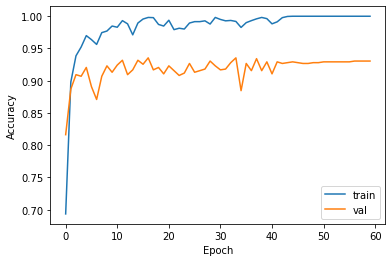

Testing set accuracy: 93.86%
Epoch 1/60
26/26 [==============================] - 0s 5ms/step - loss: 5.9963e-06 - accuracy: 1.0000 - val_loss: 0.7668 - val_accuracy: 0.9305
Epoch 2/60
26/26 [==============================] - 0s 4ms/step - loss: 5.8364e-06 - accuracy: 1.0000 - val_loss: 0.7682 - val_accuracy: 0.9305
Epoch 3/60
26/26 [==============================] - 0s 4ms/step - loss: 5.6875e-06 - accuracy: 1.0000 - val_loss: 0.7691 - val_accuracy: 0.9305
Epoch 4/60
26/26 [==============================] - 0s 4ms/step - loss: 5.5530e-06 - accuracy: 1.0000 - val_loss: 0.7700 - val_accuracy: 0.9305
Epoch 5/60
26/26 [==============================] - 0s 4ms/step - loss: 5.4245e-06 - accuracy: 1.0000 - val_loss: 0.7709 - val_accuracy: 0.9305
Epoch 6/60
26/26 [==============================] - 0s 4ms/step - loss: 5.3002e-06 - accuracy: 1.0000 - val_loss: 0.7718 - val_accuracy: 0.9305
Epoch 7/60
26/26 [==============================] - 0s 4ms/step - loss: 5.1715e-06 - accuracy: 1.0000 - val

In [24]:
#Iteration 2
validation_split = 0.2
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))
model = keras.Sequential()
model.add(layers.Dense(128, activation='softplus', input_shape=(784,)))
model.add(layers.Dense(64, activation='softplus')) 
model.add(layers.Dense(32, activation='softplus'))  
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(0.01),
              metrics=['accuracy'])
EPOCHS = 60

history = model.fit(X_train, y_train,
                    batch_size=32, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)

_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

#Early Stopping
EPOCHS = 60

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)


history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

## Iteration 3

training data shape: (25600, 784)
25600 train samples, 6400 validation samples, 10000 test samples
Epoch 1/40
400/400 [==============================] - 1s 2ms/step - loss: 0.6439 - accuracy: 0.8165 - val_loss: 0.3936 - val_accuracy: 0.8892
Epoch 2/40
400/400 [==============================] - 1s 2ms/step - loss: 0.3258 - accuracy: 0.9068 - val_loss: 0.3142 - val_accuracy: 0.9133
Epoch 3/40
400/400 [==============================] - 1s 2ms/step - loss: 0.2686 - accuracy: 0.9214 - val_loss: 0.2762 - val_accuracy: 0.9189
Epoch 4/40
400/400 [==============================] - 1s 2ms/step - loss: 0.2394 - accuracy: 0.9295 - val_loss: 0.2742 - val_accuracy: 0.9166
Epoch 5/40
400/400 [==============================] - 1s 2ms/step - loss: 0.2167 - accuracy: 0.9355 - val_loss: 0.2459 - val_accuracy: 0.9298
Epoch 6/40
400/400 [==============================] - 1s 2ms/step - loss: 0.1992 - accuracy: 0.9400 - val_loss: 0.2376 - val_accuracy: 0.9314
Epoch 7/40
400/400 [=============================

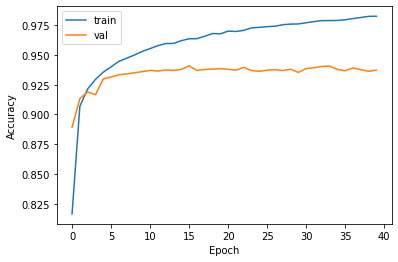

Testing set accuracy: 95.08%
Epoch 1/40
400/400 [==============================] - 1s 2ms/step - loss: 0.0572 - accuracy: 0.9827 - val_loss: 0.2742 - val_accuracy: 0.9377
Epoch 2/40
400/400 [==============================] - 1s 2ms/step - loss: 0.0562 - accuracy: 0.9831 - val_loss: 0.2656 - val_accuracy: 0.9381
Epoch 3/40
400/400 [==============================] - 1s 2ms/step - loss: 0.0537 - accuracy: 0.9841 - val_loss: 0.2802 - val_accuracy: 0.9353
Epoch 4/40
400/400 [==============================] - 1s 2ms/step - loss: 0.0523 - accuracy: 0.9843 - val_loss: 0.2748 - val_accuracy: 0.9388
Epoch 5/40
400/400 [==============================] - 1s 2ms/step - loss: 0.0516 - accuracy: 0.9839 - val_loss: 0.2790 - val_accuracy: 0.9373
Epoch 6/40
400/400 [==============================] - 1s 2ms/step - loss: 0.0503 - accuracy: 0.9851 - val_loss: 0.2990 - val_accuracy: 0.9361
Epoch 7/40
400/400 [==============================] - 1s 2ms/step - loss: 0.0488 - accuracy: 0.9848 - val_loss: 0.2945 

In [10]:
#Iteration 3
validation_split = 0.2
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))
model = keras.Sequential()
model.add(layers.Dense(16, activation='selu', input_shape=(784,)))
model.add(layers.Dense(16, activation='selu')) 
model.add(layers.Dense(16, activation='selu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['accuracy'])
EPOCHS = 40

history = model.fit(X_train, y_train,
                    batch_size=64, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

#Early Stopping
EPOCHS = 40

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=25)


history = model.fit(X_train, y_train,
                    batch_size=64, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

## Iteration 4

training data shape: (898, 784)
898 train samples, 384 validation samples, 10000 test samples
Epoch 1/100
8/8 [==============================] - 1s 25ms/step - loss: 2.1495 - accuracy: 0.2650 - val_loss: 1.7857 - val_accuracy: 0.5260
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 1.6262 - accuracy: 0.6024 - val_loss: 1.4614 - val_accuracy: 0.6276
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 1.3074 - accuracy: 0.7194 - val_loss: 1.2392 - val_accuracy: 0.7135
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 1.0960 - accuracy: 0.7795 - val_loss: 1.0884 - val_accuracy: 0.7266
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.9280 - accuracy: 0.8085 - val_loss: 0.9478 - val_accuracy: 0.7474
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.7976 - accuracy: 0.8196 - val_loss: 0.8650 - val_accuracy: 0.7708
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 

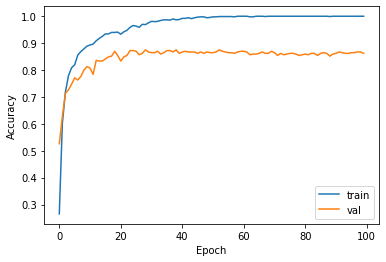

Testing set accuracy: 87.47%
Epoch 1/100
8/8 [==============================] - 0s 9ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.5468 - val_accuracy: 0.8620
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.5466 - val_accuracy: 0.8568
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.5476 - val_accuracy: 0.8568
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.5479 - val_accuracy: 0.8620
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.5419 - val_accuracy: 0.8698
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.5566 - val_accuracy: 0.8594
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.5431 - val_accuracy: 0.864

In [29]:
#Iteration 4
validation_split = 0.3
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))
model = keras.Sequential()
model.add(layers.Dense(64, activation='elu', input_shape=(784,)))
model.add(layers.Dense(32, activation='elu')) 
model.add(layers.Dense(16, activation='elu')) 
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])
EPOCHS = 100

history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))


#Early Stopping
EPOCHS = 100

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)


history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

## Iteration 5

training data shape: (13440, 784)
13440 train samples, 4480 validation samples, 10000 test samples
Epoch 1/50
210/210 [==============================] - 1s 4ms/step - loss: 2.2849 - accuracy: 0.1272 - val_loss: 2.1732 - val_accuracy: 0.1958
Epoch 2/50
210/210 [==============================] - 1s 4ms/step - loss: 2.0835 - accuracy: 0.2736 - val_loss: 2.0035 - val_accuracy: 0.3384
Epoch 3/50
210/210 [==============================] - 1s 4ms/step - loss: 1.9287 - accuracy: 0.4195 - val_loss: 1.8663 - val_accuracy: 0.4600
Epoch 4/50
210/210 [==============================] - 1s 4ms/step - loss: 1.8009 - accuracy: 0.5107 - val_loss: 1.7511 - val_accuracy: 0.5366
Epoch 5/50
210/210 [==============================] - 1s 4ms/step - loss: 1.6928 - accuracy: 0.5719 - val_loss: 1.6527 - val_accuracy: 0.5911
Epoch 6/50
210/210 [==============================] - 1s 4ms/step - loss: 1.5999 - accuracy: 0.6206 - val_loss: 1.5675 - val_accuracy: 0.6333
Epoch 7/50
210/210 [=============================

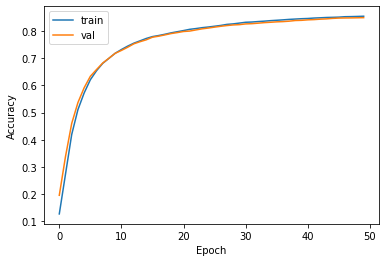

Testing set accuracy: 85.71%
Epoch 1/50
210/210 [==============================] - 1s 4ms/step - loss: 0.6699 - accuracy: 0.8551 - val_loss: 0.6893 - val_accuracy: 0.8504
Epoch 2/50
210/210 [==============================] - 1s 4ms/step - loss: 0.6648 - accuracy: 0.8554 - val_loss: 0.6843 - val_accuracy: 0.8507
Epoch 3/50
210/210 [==============================] - 1s 4ms/step - loss: 0.6598 - accuracy: 0.8562 - val_loss: 0.6795 - val_accuracy: 0.8511
Epoch 4/50
210/210 [==============================] - 1s 4ms/step - loss: 0.6550 - accuracy: 0.8570 - val_loss: 0.6749 - val_accuracy: 0.8516
Epoch 5/50
210/210 [==============================] - 1s 4ms/step - loss: 0.6503 - accuracy: 0.8577 - val_loss: 0.6704 - val_accuracy: 0.8529
Epoch 6/50
210/210 [==============================] - 1s 4ms/step - loss: 0.6457 - accuracy: 0.8586 - val_loss: 0.6660 - val_accuracy: 0.8533
Epoch 7/50
210/210 [==============================] - 1s 4ms/step - loss: 0.6413 - accuracy: 0.8594 - val_loss: 0.6617 

In [12]:
#Iteration 5
validation_split = 0.25
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))
model = keras.Sequential()
model.add(layers.Dense(512, activation='tanh', input_shape=(784,)))
model.add(layers.Dense(128, activation='tanh')) 
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(0.0001),
              metrics=['accuracy'])
EPOCHS = 50

history = model.fit(X_train, y_train,
                    batch_size=64, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

#Early Stopping
EPOCHS = 50

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)


history = model.fit(X_train, y_train,
                    batch_size=64, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

## Iteration 6

training data shape: (11200, 784)
11200 train samples, 2240 validation samples, 10000 test samples
Epoch 1/40
175/175 [==============================] - 1s 3ms/step - loss: 2.3221 - accuracy: 0.1246 - val_loss: 2.3020 - val_accuracy: 0.1679
Epoch 2/40
175/175 [==============================] - 0s 2ms/step - loss: 2.2741 - accuracy: 0.1996 - val_loss: 2.2603 - val_accuracy: 0.2473
Epoch 3/40
175/175 [==============================] - 0s 2ms/step - loss: 2.2338 - accuracy: 0.2685 - val_loss: 2.2211 - val_accuracy: 0.2987
Epoch 4/40
175/175 [==============================] - 0s 2ms/step - loss: 2.1927 - accuracy: 0.3148 - val_loss: 2.1785 - val_accuracy: 0.3384
Epoch 5/40
175/175 [==============================] - 0s 2ms/step - loss: 2.1471 - accuracy: 0.3534 - val_loss: 2.1310 - val_accuracy: 0.3643
Epoch 6/40
175/175 [==============================] - 0s 2ms/step - loss: 2.0956 - accuracy: 0.3847 - val_loss: 2.0771 - val_accuracy: 0.4067
Epoch 7/40
175/175 [=============================

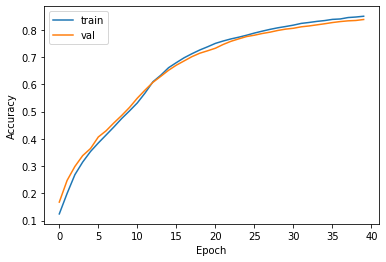

Testing set accuracy: 85.04%
Epoch 1/40
175/175 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.8529 - val_loss: 0.5755 - val_accuracy: 0.8393
Epoch 2/40
175/175 [==============================] - 0s 2ms/step - loss: 0.5303 - accuracy: 0.8554 - val_loss: 0.5659 - val_accuracy: 0.8411
Epoch 3/40
175/175 [==============================] - 0s 2ms/step - loss: 0.5206 - accuracy: 0.8586 - val_loss: 0.5561 - val_accuracy: 0.8433
Epoch 4/40
175/175 [==============================] - 0s 2ms/step - loss: 0.5114 - accuracy: 0.8612 - val_loss: 0.5480 - val_accuracy: 0.8464
Epoch 5/40
175/175 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.8621 - val_loss: 0.5385 - val_accuracy: 0.8469
Epoch 6/40
175/175 [==============================] - 0s 2ms/step - loss: 0.4942 - accuracy: 0.8654 - val_loss: 0.5312 - val_accuracy: 0.8496
Epoch 7/40
175/175 [==============================] - 0s 2ms/step - loss: 0.4861 - accuracy: 0.8662 - val_loss: 0.5234 

In [13]:
#Iteration 6
validation_split = 0.166667
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(784,)))
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(64, activation='relu')) 
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(0.001),
              metrics=['accuracy'])
EPOCHS = 40

history = model.fit(X_train, y_train,
                    batch_size=64, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

#Early Stopping
EPOCHS = 40

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=25)


history = model.fit(X_train, y_train,
                    batch_size=64, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

## Iteration 7

training data shape: (2615, 784)
2615 train samples, 290 validation samples, 10000 test samples
Epoch 1/75
21/21 [==============================] - 1s 12ms/step - loss: 1.7016 - accuracy: 0.4719 - val_loss: 1.2553 - val_accuracy: 0.6793
Epoch 2/75
21/21 [==============================] - 0s 5ms/step - loss: 0.9859 - accuracy: 0.7465 - val_loss: 0.9424 - val_accuracy: 0.7414
Epoch 3/75
21/21 [==============================] - 0s 5ms/step - loss: 0.7359 - accuracy: 0.8195 - val_loss: 0.7863 - val_accuracy: 0.7828
Epoch 4/75
21/21 [==============================] - 0s 5ms/step - loss: 0.6015 - accuracy: 0.8505 - val_loss: 0.6942 - val_accuracy: 0.8172
Epoch 5/75
21/21 [==============================] - 0s 5ms/step - loss: 0.5166 - accuracy: 0.8677 - val_loss: 0.6318 - val_accuracy: 0.8345
Epoch 6/75
21/21 [==============================] - 0s 6ms/step - loss: 0.4540 - accuracy: 0.8834 - val_loss: 0.5993 - val_accuracy: 0.8207
Epoch 7/75
21/21 [==============================] - 0s 5ms/step

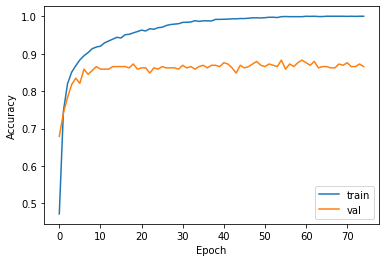

Testing set accuracy: 90.11%
Epoch 1/75
21/21 [==============================] - 0s 7ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.5076 - val_accuracy: 0.8759
Epoch 2/75
21/21 [==============================] - 0s 5ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.5079 - val_accuracy: 0.8793
Epoch 3/75
21/21 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.5185 - val_accuracy: 0.8655
Epoch 4/75
21/21 [==============================] - 0s 6ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.5193 - val_accuracy: 0.8690
Epoch 5/75
21/21 [==============================] - 0s 6ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.5337 - val_accuracy: 0.8690
Epoch 6/75
21/21 [==============================] - 0s 5ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.5380 - val_accuracy: 0.8724
Epoch 7/75
21/21 [==============================] - 0s 5ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.5480 - val_accuracy

In [26]:
#Iteration 7
validation_split = 0.1
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))
model = keras.Sequential()
model.add(layers.Dense(512, activation='selu', input_shape=(784,)))
model.add(layers.Dense(128, activation='selu')) 
model.add(layers.Dense(16, activation='selu')) 
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(0.0001),
              metrics=['accuracy'])
EPOCHS = 75

history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

#Early Stopping
EPOCHS = 75

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)


history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

## Iteration 8

training data shape: (8064, 784)
8064 train samples, 2016 validation samples, 10000 test samples
Epoch 1/60
16/16 [==============================] - 1s 15ms/step - loss: 2.3191 - accuracy: 0.1586 - val_loss: 2.1492 - val_accuracy: 0.2604
Epoch 2/60
16/16 [==============================] - 0s 6ms/step - loss: 1.9489 - accuracy: 0.3728 - val_loss: 1.6102 - val_accuracy: 0.5000
Epoch 3/60
16/16 [==============================] - 0s 6ms/step - loss: 1.2171 - accuracy: 0.6405 - val_loss: 0.9045 - val_accuracy: 0.7346
Epoch 4/60
16/16 [==============================] - 0s 6ms/step - loss: 0.7389 - accuracy: 0.7884 - val_loss: 0.6984 - val_accuracy: 0.7961
Epoch 5/60
16/16 [==============================] - 0s 6ms/step - loss: 0.5588 - accuracy: 0.8404 - val_loss: 0.5875 - val_accuracy: 0.8343
Epoch 6/60
16/16 [==============================] - 0s 6ms/step - loss: 0.4757 - accuracy: 0.8669 - val_loss: 0.5159 - val_accuracy: 0.8512
Epoch 7/60
16/16 [==============================] - 0s 6ms/ste

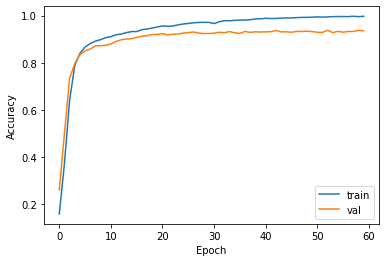

Testing set accuracy: 93.75%
Epoch 1/60
16/16 [==============================] - 0s 8ms/step - loss: 0.0156 - accuracy: 0.9983 - val_loss: 0.3029 - val_accuracy: 0.9306
Epoch 2/60
16/16 [==============================] - 0s 6ms/step - loss: 0.0144 - accuracy: 0.9985 - val_loss: 0.3118 - val_accuracy: 0.9296
Epoch 3/60
16/16 [==============================] - 0s 6ms/step - loss: 0.0146 - accuracy: 0.9980 - val_loss: 0.3012 - val_accuracy: 0.9335
Epoch 4/60
16/16 [==============================] - 0s 6ms/step - loss: 0.0134 - accuracy: 0.9981 - val_loss: 0.3081 - val_accuracy: 0.9330
Epoch 5/60
16/16 [==============================] - 0s 6ms/step - loss: 0.0135 - accuracy: 0.9991 - val_loss: 0.3192 - val_accuracy: 0.9340
Testing set accuracy: 93.80%


In [15]:
#Iteration 8

validation_split = 0.2
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))
model = keras.Sequential()
model.add(layers.Dense(128, activation='softplus', input_shape=(784,)))
model.add(layers.Dense(64, activation='softplus')) 
model.add(layers.Dense(32, activation='softplus'))
model.add(layers.Dense(16, activation='softplus'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])
EPOCHS = 60

history = model.fit(X_train, y_train,
                    batch_size=512, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

#Early Stopping
EPOCHS = 60

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)


history = model.fit(X_train, y_train,
                    batch_size=512, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

## Iteration 9

training data shape: (6452, 784)
6452 train samples, 1612 validation samples, 10000 test samples
Epoch 1/60
51/51 [==============================] - 1s 7ms/step - loss: 1.0257 - accuracy: 0.6971 - val_loss: 0.4470 - val_accuracy: 0.8679
Epoch 2/60
51/51 [==============================] - 0s 4ms/step - loss: 0.3782 - accuracy: 0.8858 - val_loss: 0.3542 - val_accuracy: 0.8883
Epoch 3/60
51/51 [==============================] - 0s 4ms/step - loss: 0.2896 - accuracy: 0.9115 - val_loss: 0.3083 - val_accuracy: 0.9088
Epoch 4/60
51/51 [==============================] - 0s 5ms/step - loss: 0.2524 - accuracy: 0.9225 - val_loss: 0.2790 - val_accuracy: 0.9175
Epoch 5/60
51/51 [==============================] - 0s 5ms/step - loss: 0.2350 - accuracy: 0.9264 - val_loss: 0.3035 - val_accuracy: 0.8976
Epoch 6/60
51/51 [==============================] - 0s 4ms/step - loss: 0.1995 - accuracy: 0.9396 - val_loss: 0.2617 - val_accuracy: 0.9194
Epoch 7/60
51/51 [==============================] - 0s 4ms/step

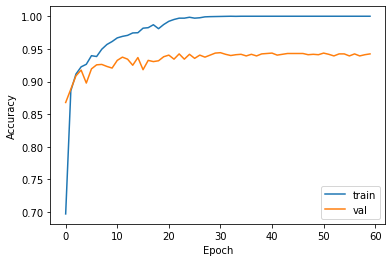

Testing set accuracy: 93.88%
Epoch 1/60
51/51 [==============================] - 0s 5ms/step - loss: 3.7683e-04 - accuracy: 1.0000 - val_loss: 0.3387 - val_accuracy: 0.9404
Epoch 2/60
51/51 [==============================] - 0s 4ms/step - loss: 3.4268e-04 - accuracy: 1.0000 - val_loss: 0.3352 - val_accuracy: 0.9423
Epoch 3/60
51/51 [==============================] - 0s 4ms/step - loss: 3.2994e-04 - accuracy: 1.0000 - val_loss: 0.3364 - val_accuracy: 0.9411
Epoch 4/60
51/51 [==============================] - 0s 4ms/step - loss: 3.1772e-04 - accuracy: 1.0000 - val_loss: 0.3389 - val_accuracy: 0.9435
Epoch 5/60
51/51 [==============================] - 0s 4ms/step - loss: 2.9725e-04 - accuracy: 1.0000 - val_loss: 0.3413 - val_accuracy: 0.9404
Epoch 6/60
51/51 [==============================] - 0s 4ms/step - loss: 2.8610e-04 - accuracy: 1.0000 - val_loss: 0.3427 - val_accuracy: 0.9429
Epoch 7/60
51/51 [==============================] - 0s 4ms/step - loss: 2.7481e-04 - accuracy: 1.0000 - val

In [16]:
#Iteration 9
validation_split = 0.2
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))
model = keras.Sequential()
model.add(layers.Dense(512, activation='softplus', input_shape=(784,)))
model.add(layers.Dense(128, activation='softplus')) 
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])
EPOCHS = 60

history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

#Early Stopping
EPOCHS = 60

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)


history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

## Iteration 10 - Recommended hyperparameters

training data shape: (4839, 784)
4839 train samples, 1613 validation samples, 10000 test samples
Epoch 1/60
38/38 [==============================] - 1s 10ms/step - loss: 0.8275 - accuracy: 0.7328 - val_loss: 0.3561 - val_accuracy: 0.8946
Epoch 2/60
38/38 [==============================] - 0s 6ms/step - loss: 0.3177 - accuracy: 0.9033 - val_loss: 0.2489 - val_accuracy: 0.9200
Epoch 3/60
38/38 [==============================] - 0s 6ms/step - loss: 0.2201 - accuracy: 0.9326 - val_loss: 0.1996 - val_accuracy: 0.9386
Epoch 4/60
38/38 [==============================] - 0s 6ms/step - loss: 0.1595 - accuracy: 0.9490 - val_loss: 0.1918 - val_accuracy: 0.9386
Epoch 5/60
38/38 [==============================] - 0s 6ms/step - loss: 0.1090 - accuracy: 0.9653 - val_loss: 0.2350 - val_accuracy: 0.9293
Epoch 6/60
38/38 [==============================] - 0s 6ms/step - loss: 0.0799 - accuracy: 0.9766 - val_loss: 0.1650 - val_accuracy: 0.9554
Epoch 7/60
38/38 [==============================] - 0s 6ms/ste

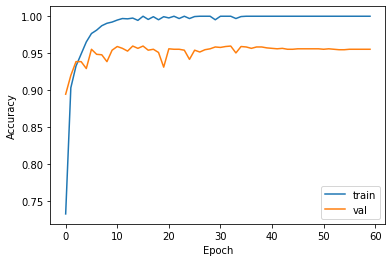

Testing set accuracy: 95.45%
Epoch 1/60
38/38 [==============================] - 0s 7ms/step - loss: 1.3303e-09 - accuracy: 1.0000 - val_loss: 0.3538 - val_accuracy: 0.9554
Epoch 2/60
38/38 [==============================] - 0s 6ms/step - loss: 1.2318e-09 - accuracy: 1.0000 - val_loss: 0.3532 - val_accuracy: 0.9547
Epoch 3/60
38/38 [==============================] - 0s 6ms/step - loss: 1.1579e-09 - accuracy: 1.0000 - val_loss: 0.3533 - val_accuracy: 0.9554
Epoch 4/60
38/38 [==============================] - 0s 6ms/step - loss: 1.1825e-09 - accuracy: 1.0000 - val_loss: 0.3529 - val_accuracy: 0.9554
Epoch 5/60
38/38 [==============================] - 0s 6ms/step - loss: 1.1086e-09 - accuracy: 1.0000 - val_loss: 0.3527 - val_accuracy: 0.9554
Epoch 6/60
38/38 [==============================] - 0s 6ms/step - loss: 1.0593e-09 - accuracy: 1.0000 - val_loss: 0.3527 - val_accuracy: 0.9560
Epoch 7/60
38/38 [==============================] - 0s 6ms/step - loss: 1.0100e-09 - accuracy: 1.0000 - val

In [17]:
#Iteration 10
validation_split = 0.25
index = np.random.permutation(X_train.shape[0])

train_idx = int(X_train.shape[0]*validation_split)

X_val, X_train = X_train[index[:train_idx]], X_train[index[train_idx:]]
y_val, y_train = y_train[index[:train_idx]], y_train[index[train_idx:]]

print('training data shape:', X_train.shape)
print('{} train samples, {} validation samples, {} test samples'\
      .format(X_train.shape[0], X_val.shape[0], X_test.shape[0]))
model = keras.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(0.001),
              metrics=['accuracy'])
EPOCHS = 60

history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val))
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist.tail()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label="train")
    plt.plot(hist['epoch'], hist['val_accuracy'], label="val")
    plt.legend()
    plt.show()

plot_history(history)
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

#Early Stopping
EPOCHS = 60

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=40)


history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

## Grid Search - Force stopped after 1000 iterations (computationally heavy)

In [7]:
import numpy as np
from keras.utils import np_utils
from keras.optimizers import SGD, Adam, RMSprop, Adagrad
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.optimizers import SGD, Adam, RMSprop, Adagrad

# # Preprocess the labels
# num_classes = 10
# y_train = np_utils.to_categorical(y_train, num_classes)
# y_test = np_utils.to_categorical(y_test, num_classes)

# Define the model
model = keras.Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Define the hyperparameters to tune
batch_size = [32, 64,128]
epochs = [10, 20, 40]
optimizer = ['SGD', 'Adam', 'RMSprop']
learn_rate = [0.01, 0.001, 0.0001]
activation = ['relu', 'sigmoid', 'softplus', 'tanh', 'elu', 'selu']
layer_architecture = [[64, 32, 16], [16, 16, 16]]
patience = [False, 5, 20]
validation_set_size = [0.1, 0.2]

# Perform the hyperparameter tuning
for bs in batch_size:
    for ep in epochs:
        for opt in optimizer:
            for lr in learn_rate:
                for act in activation:
                    for la in layer_architecture:
                        for pat in patience:
                            for vss in validation_set_size:
                                model = Sequential()
                                model.add(Dense(la[0], activation=act, input_shape=(784,)))
                                model.add(Dense(la[1], activation=act))
                                model.add(Dense(la[2], activation=act))
                                model.add(Dense(10, activation='softmax'))
                                if opt == 'SGD':
                                    optimizer = SGD(lr=lr)
                                elif opt == 'Adam':
                                    optimizer = Adam(lr=lr)
                                elif opt == 'RMSprop':
                                    optimizer = RMSprop(lr=lr)
                                else:
                                    optimizer = Adagrad(lr=lr)
                                model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
                                early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=pat)
                                history = model.fit(X_train, y_train, batch_size=bs, epochs=ep, verbose=0, validation_split=vss, callbacks=[early_stopping])
                                acc = model.evaluate(X_test, y_test, verbose=0)
                                print(bs,"-",ep,"-",opt,"-",lr,"-",act,"-",la,"-",pat,"-",vss,"-",acc)


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


32 - 10 - SGD - 0.01 - relu - [64, 32, 16] - False - 0.1 - [0.30280759930610657, 0.9124000072479248]
32 - 10 - SGD - 0.01 - relu - [64, 32, 16] - False - 0.2 - [0.30647534132003784, 0.9121000170707703]
32 - 10 - SGD - 0.01 - relu - [64, 32, 16] - 5 - 0.1 - [0.17756815254688263, 0.9462000131607056]
32 - 10 - SGD - 0.01 - relu - [64, 32, 16] - 5 - 0.2 - [0.1357135772705078, 0.9606000185012817]
32 - 10 - SGD - 0.01 - relu - [64, 32, 16] - 20 - 0.1 - [0.13022761046886444, 0.9603999853134155]
32 - 10 - SGD - 0.01 - relu - [64, 32, 16] - 20 - 0.2 - [0.14934144914150238, 0.9555000066757202]
32 - 10 - SGD - 0.01 - relu - [16, 16, 16] - False - 0.1 - [0.358989953994751, 0.8952999711036682]
32 - 10 - SGD - 0.01 - relu - [16, 16, 16] - False - 0.2 - [0.36283984780311584, 0.8967999815940857]
32 - 10 - SGD - 0.01 - relu - [16, 16, 16] - 5 - 0.1 - [0.20570912957191467, 0.9405999779701233]
32 - 10 - SGD - 0.01 - relu - [16, 16, 16] - 5 - 0.2 - [0.25024378299713135, 0.923799991607666]
32 - 10 - SGD - 

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32 - 10 - Adam - 0.01 - relu - [64, 32, 16] - False - 0.1 - [0.17125628888607025, 0.9549000263214111]
32 - 10 - Adam - 0.01 - relu - [64, 32, 16] - False - 0.2 - [0.1659860908985138, 0.9528999924659729]
32 - 10 - Adam - 0.01 - relu - [64, 32, 16] - 5 - 0.1 - [0.17745532095432281, 0.9584000110626221]
32 - 10 - Adam - 0.01 - relu - [64, 32, 16] - 5 - 0.2 - [0.1795770823955536, 0.9607999920845032]
32 - 10 - Adam - 0.01 - relu - [64, 32, 16] - 20 - 0.1 - [0.18721267580986023, 0.9617999792098999]
32 - 10 - Adam - 0.01 - relu - [64, 32, 16] - 20 - 0.2 - [0.1924615353345871, 0.9577999711036682]
32 - 10 - Adam - 0.01 - relu - [16, 16, 16] - False - 0.1 - [0.25050535798072815, 0.9273999929428101]
32 - 10 - Adam - 0.01 - relu - [16, 16, 16] - False - 0.2 - [0.3054773211479187, 0.9168999791145325]
32 - 10 - Adam - 0.01 - relu - [16, 16, 16] - 5 - 0.1 - [0.2552424669265747, 0.9366000294685364]
32 - 10 - Adam - 0.01 - relu - [16, 16, 16] - 5 - 0.2 - [0.3181670606136322, 0.9194999933242798]
32 - 10 

KeyboardInterrupt: ignored

### Inspect the model

Use the `.summary` method to print a simple description of the model

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [9]:
EPOCHS = 20

history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val))

Epoch 1/20
391/391 [==============================] - 16s 35ms/step - loss: 0.2597 - accuracy: 0.9210 - val_loss: 0.1406 - val_accuracy: 0.9583
Epoch 2/20
391/391 [==============================] - 4s 11ms/step - loss: 0.0959 - accuracy: 0.9709 - val_loss: 0.1130 - val_accuracy: 0.9673
Epoch 3/20
391/391 [==============================] - 5s 12ms/step - loss: 0.0610 - accuracy: 0.9815 - val_loss: 0.0910 - val_accuracy: 0.9750
Epoch 4/20
391/391 [==============================] - 4s 11ms/step - loss: 0.0428 - accuracy: 0.9860 - val_loss: 0.0996 - val_accuracy: 0.9735
Epoch 5/20
391/391 [==============================] - 4s 11ms/step - loss: 0.0311 - accuracy: 0.9900 - val_loss: 0.1052 - val_accuracy: 0.9742
Epoch 6/20
391/391 [==============================] - 4s 11ms/step - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.1089 - val_accuracy: 0.9738
Epoch 7/20
391/391 [==============================] - 4s 11ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 0.1061 - val_accuracy: 0.977

### Make predictions

Calculate the classification accuracy for testing set

In [11]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 98.26%


Make predictions for testing data

In [12]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, 0, 4])

Visualize predictions

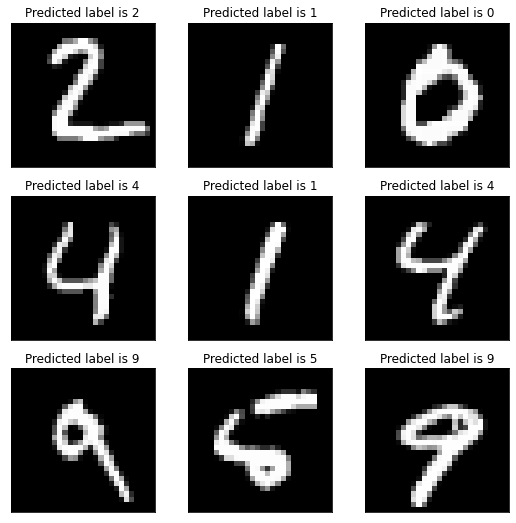

In [13]:
fig = plt.figure(figsize=(9, 9))
col = 3
row = 3
for i in range(1, col*row +1):
    pred = y_pred[i]
    img = X_test_pre[i,:]
    fig.add_subplot(row, col, i)
    plt.title('Predicted label is {}'.format(pred))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
plt.show()

## Early Stopping

In [19]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))
EPOCHS = 20

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)


history = model.fit(X_train, y_train,
                    batch_size=128, epochs=EPOCHS,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

Testing set accuracy: 95.16%
Epoch 1/20
38/38 [==============================] - 0s 6ms/step - loss: 7.0293e-05 - accuracy: 1.0000 - val_loss: 0.2151 - val_accuracy: 0.9566
Epoch 2/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0062 - accuracy: 0.9986 - val_loss: 0.2115 - val_accuracy: 0.9578
Epoch 3/20
38/38 [==============================] - 0s 5ms/step - loss: 7.4835e-05 - accuracy: 1.0000 - val_loss: 0.2097 - val_accuracy: 0.9585
Epoch 4/20
38/38 [==============================] - 0s 5ms/step - loss: 2.1284e-05 - accuracy: 1.0000 - val_loss: 0.2284 - val_accuracy: 0.9523
Epoch 5/20
38/38 [==============================] - 0s 5ms/step - loss: 0.0090 - accuracy: 0.9977 - val_loss: 0.2319 - val_accuracy: 0.9585


In [20]:
_, acc = model.evaluate(X_test, y_test, verbose=0)

print("Testing set accuracy: {:.2f}%".format(acc*100))

Testing set accuracy: 95.04%
